In [31]:
import numpy as np
import re

In [32]:
version = [1]
data_raw = ""
for ver in version :  
  with open("/content/script_talk_speech_his_77_949_" + str(ver) + ".txt", 'r') as f :
    data_raw += f.read()
print(data_raw)
data_raw = data_raw.split(". ")
data = []

for i in range(len(data_raw)) :
  data.append(re.sub('[0-9]', 'numbernumber', data_raw[i]))
  data[i] = re.sub('[^가-힣a-zA-Z\s]', '', data[i])

안녕하십니까. 여러분들 추석은 잘 보내셨죠. 떡국도 많이 먹고. 송편 아니고 떡국이라고요. 어차피 뭐 아무 때나 뭘 먹으면 무슨 상관이 있습니까 그렇죠. 먹으면 되는 거지. 많이 먹으면 되는 거지. 어쨌든 날씨가 좀 쌀쌀해지고 있습니다. 환절기인데 오늘 아침에 나올 때도 보니까 선생님이 쌀쌀했어요. 오후에는 좀 약간 또 기온도 올라가겠죠. 이런 날이 일수록 건강에 유의하시는 거 수험생이 필수 덕목이라는 것 꼭 좀 생각하시고 오늘 지난번에 이어서 11번 문제. 11번 문제가 근현대사 물론 조선 후기 문화사라든가 그 현대사가 나올 텐데 그 문제를 한번 해결해 보도록 하겠습니다. 그러면 일본 문제부터 한번 출발을 한번 해보도록 할게요. 일본 문제를 출발해 보면 일본 문제를 지금 아직도 다 알아셨나. 모르겠는데 정답률이 이런 정도의 문제는 굉장히 높게 나와야 하는데 그렇게 그런 수준은 아닌 것 같아. 보니까 지금 보시면 일단 팬부터 한번 확인을 해볼게요. 일본 문제를 보시면. 다음 중 다음에 말하는 왕이 업적으로 오른 건 이렇게 이야기를 했잖아요. 그런데 지금 오답자를 보니까 일본 오답자가 의외로 좀 많네요. 보면 일단 일부. 농담이 뭐가. 일단 왕 자체가 왕이 충수강이 둘째 아들이라고 이야기를 했죠. 충수강의 둘째 아들이고 노국대장공주와 혼인을 했다 이렇게 이야기를 했는데 이건 기본입니다. 여러분들 있잖아요. 오래간섭기의 원행. 간섭기는 충렬왕은 제국대장군의 충렬. 제국 이렇게 이야기를 하고. 충선왕은 계곡 대장 공주. 충선 계곡 충렬 제국 충선 계곡 그리고 국민 노국입니다. 물론 국민항은 다음은 자주 개혁을 단행한 왕이니까 원외 간섭기에 들어가는 왕은 아니지만 어쨌든 노국 대장 공주와 혼인을 했다고 해서 이 얘기를 가지고 우리가 공민화라는 걸 일단 알 수 있습니다. 국민항을 알면 이 문제를 해결하기가 어려운 건 아니잖아요 그렇죠. 첫 번째 소금 저장 배급 관서인 의염. 참 염 자가 바로 소금 염장을 쓴 거니까 소금 저장 창고를 의험창이라고 하는데 이거 암기법 이야

<input>:12: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \s
<ipython-input-32-ee13140a5ad7>:12: DeprecationWarning: invalid escape sequence \s
  data[i] = re.sub('[^가-힣a-zA-Z\s]', '', data[i])


In [33]:
print(len(data))
print(data[3])

337
송편 아니고 떡국이라고요


In [34]:
pip install konlpy

In [35]:
from konlpy.tag import Kkma
kkma = Kkma()
dataset = []
for d in data :
  dataset.append(kkma.nouns(d))

In [36]:
from gensim import corpora, models
high_frequency = [[y for y in x if not len(y) == 1] for x in dataset]
ditt = corpora.Dictionary(high_frequency)
corpus = [ditt.doc2bow(d) for d in high_frequency] 

In [37]:
# stopwords = ['이야기', '얘기', '이것', '문제', '그다음', '여기', '생각', '부분', '경우', '여러분', '다음', '우리', '무엇', '이번', '한번', '설명', '사실', '정답', '오답', '언제', '이거']
# for i in range(len(high_frequency)) :
#   if len(list(set(high_frequency[i]).intersection(stopwords))) > 0 :
#     for stop in list(set(high_frequency[i]).intersection(stopwords)) :
#       high_frequency[i] = re.sub(stop, '', ' '.join(high_frequency[i])).split()
 
# ditt = corpora.Dictionary(high_frequency)
# corpus = [ditt.doc2bow(d) for d in high_frequency]

In [38]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import gensim
coherence_values = []
for i in range(2, 20) :
  LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = ditt)
  coherence_model = CoherenceModel(model = LDAmodel, texts=high_frequency, dictionary=ditt, topn = 10)
  coherence_lda = coherence_model.get_coherence()
  coherence_values.append(coherence_lda) 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

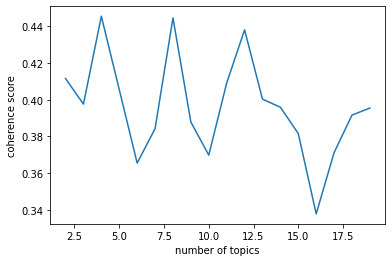

In [39]:
x = range(2, 20)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
#의미적 일관성

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

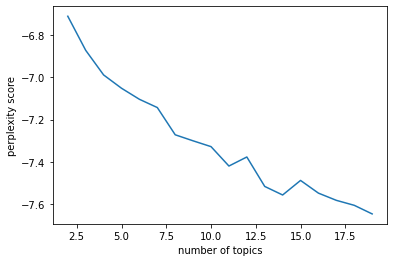

In [40]:
perplexity_values = []
for i in range(2, 20) :
  LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = ditt)
  perplexity_values.append(LDAmodel.log_perplexity(corpus))

x = range(2, 20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()
#헷갈리는? 낮을수록 정확하게

In [41]:
n_topics = 12
LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = n_topics, id2word = ditt)
LDAmodel.print_topics(num_words=20)


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.017*"문제" + 0.017*"이야기" + 0.017*"중경" + 0.011*"우리" + 0.011*"거란" + 0.011*"초기" + 0.011*"국가" + 0.011*"무신" + 0.011*"침략" + 0.011*"대외" + 0.011*"재정" + 0.011*"관계" + 0.011*"초조" + 0.011*"시작" + 0.011*"초조대장경" + 0.011*"수입" + 0.011*"집권" + 0.011*"대장경" + 0.011*"인종" + 0.011*"한번"'),
 (1,
  '0.044*"이야기" + 0.016*"단체" + 0.012*"설립" + 0.012*"운동" + 0.012*"애국" + 0.012*"국민" + 0.012*"처음" + 0.012*"고려" + 0.010*"양반" + 0.010*"국가" + 0.010*"얘기" + 0.009*"우리" + 0.008*"여러분" + 0.008*"그다음" + 0.008*"수업" + 0.008*"증가" + 0.008*"나라" + 0.008*"문제" + 0.008*"계몽" + 0.008*"집집"'),
 (2,
  '0.027*"우리" + 0.019*"나라" + 0.018*"역사" + 0.018*"이야기" + 0.014*"우리나라" + 0.014*"오답" + 0.014*"중요" + 0.013*"역사서" + 0.010*"이것" + 0.010*"편찬" + 0.010*"여러분" + 0.010*"표현" + 0.010*"증가" + 0.010*"동국" + 0.010*"이번" + 0.010*"자가" + 0.010*"운동" + 0.010*"자체" + 0.010*"오답자가" + 0.010*"교육"'),
 (3,
  '0.018*"일본" + 0.018*"자강" + 0.018*"다음" + 0.015*"고려" + 0.015*"그다음" + 0.012*"제국" + 0.012*"충렬" + 0.012*"항전" + 0.012*"충선" + 0.012*"압력" + 0.012*"과의" + 0.012*"초급" + 0.012*"성균관" +

In [42]:
print(high_frequency[13])

['일본', '문제', '출발']


In [ ]:
stopwords = ['이야기', '얘기', '이것', '문제', '그다음', '여기', '생각', '부분', '경우', '여러분', '다음', '우리', '무엇', '이번', '한번', '설명', '사실', '정답', '오답', '언제', '이거']
for i in range(len(high_frequency)) :
  if len(list(set(high_frequency[i]).intersection(stopwords))) > 0 :
    for stop in list(set(high_frequency[i]).intersection(stopwords)) :
      high_frequency[i] = re.sub(stop, '', ' '.join(high_frequency[i])).split()
 
ditt = corpora.Dictionary(high_frequency)
corpus = [ditt.doc2bow(d) for d in high_frequency]

LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = n_topics, id2word = ditt)
LDAmodel.print_topics(num_words=20)

In [44]:
import pickle
with open("/content/result_LDAmodel_77_949_n=" + str(n_topics), 'wb') as f : 
  pickle.dump(LDAmodel, f)

In [45]:
with open("/content/drive/MyDrive/학습카드 자동 생성 프로젝트/210126/LDA/corpus_LDAmodel_77_949", 'wb') as f :
  js = {"corpus" : corpus, "dict" : ditt}
  pickle.dump(js, f)

In [46]:
print(len(ditt))

# 개수 많으면 적은 빈도의 단어 데이터셋에서 지우기

# from collections import Counter
# flat_frequency = [item for temp in high_frequency for item in temp]
# Counter(flat_frequency).most_common()

639


In [47]:
pip install pyLDAvis

In [48]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(LDAmodel, corpus, ditt)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.053418 -0.063456       1        1  10.178578
8      0.102115  0.052312       2        1   9.524671
5     -0.080008  0.124460       3        1   9.419174
4     -0.140846 -0.028539       4        1   9.193772
0     -0.054234  0.037256       5        1   8.484783
10    -0.070055 -0.106366       6        1   8.416557
1     -0.047104 -0.087385       7        1   8.276338
9      0.066481 -0.104687       8        1   8.031881
6      0.010358  0.041324       9        1   7.616010
2      0.119094  0.025954      10        1   7.357116
11    -0.026303  0.101096      11        1   6.762814
7      0.067083  0.008032      12        1   6.738306, topic_info=    Term      Freq     Total Category  logprob  loglift
74    자가  7.000000  7.000000  Default  30.0000  30.0000
536   증가  7.000000  7.000000  Default  29.0000  29.0000
27    일본  8.000000  8.000000  Default  28.0000  28.0000
129  역사서  7.000000  7.000000  Default  27.0000  27.0000
184  고려사  5.000000  5.000000  Default  26.0000  26.0000
..   ...       ...       ...      ...      ...      ...
186   원래  0.701885  2.036182  Topic12  -4.8481   1.6323
259   수업  0.701885  2.668961  Topic12  -4.8481   1.3617
37    아들  0.701884  2.636430  Topic12  -4.8481   1.3739
448  이자겸  0.701884  2.680016  Topic12  -4.8481   1.3576
54    충렬  0.701884  1.960189  Topic12  -4.8481   1.6703

[685 rows x 6 columns], token_table=      Topic      Freq Term
term                      
513       5  0.711728   가능
393       1  0.491115   가지
393      12  0.491115   가지
194       8  0.762025   각도
147       2  0.289164   각목
...     ...       ...  ...
428       2  0.732713   후신
301       6  0.502883   후예
301      10  0.502883   후예
191       8  0.762025   휘자
290       9  0.746910   희가

[857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 6, 5, 1, 11, 2, 10, 7, 3, 12, 8])

In [49]:
import pandas as pd

def sort_topic(ldamodel, corpus) :
  topic_table = pd.DataFrame()
  for i, topic_list in enumerate(ldamodel[corpus]) :
    doc = topic_list[0] if ldamodel.per_word_topics else topic_list
    doc = sorted(doc, key = lambda x : (x[1]), reverse = True)

    for j, (topic_num, prop_topic) in enumerate(doc) :  #토픽 번호와 차지하는 비중 나눠서 저장
      if j == 0 :
        topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic, 4), topic_list]), ignore_index = True)
      else : 
        break

  return topic_table  

topictable = sort_topic(LDAmodel, corpus)
topictable = topictable.reset_index()
# topictable.colums = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토핑의 비중']
topictable[:5]


,index,0,1,2
0,0,0.0,0.5417,"[(0, 0.5416667), (1, 0.041666668), (2, 0.04166..."
1,1,3.0,0.5417,"[(0, 0.041666668), (1, 0.041666668), (2, 0.041..."
2,2,6.0,0.5417,"[(0, 0.041666668), (1, 0.041666668), (2, 0.041..."
3,3,6.0,0.6944,"[(0, 0.027777782), (1, 0.027777782), (2, 0.027..."
4,4,5.0,0.5417,"[(0, 0.041666668), (1, 0.041666668), (2, 0.041..."


In [50]:
topictable = topictable.sort_values(by = [0], ascending=True)
topictable = topictable.reset_index(drop=True)
doc = []
j = 0
for i in range(n_topics) :
  temp = []
  while topictable.iloc[j, 1] == i :
    temp.append([topictable.iloc[j, 0], data[int(topictable.iloc[j, 0])]])
    j += 1
    if j == len(topictable) :
      break
  doc.append(temp)

doc_sort_list = []

for docc in doc :
  doc_sort = pd.DataFrame(docc)
  doc_sort.columns = ['문장 번호', '내용']
  doc_sort.sort_values(by = ['문장 번호'], ascending = True, inplace=True)
  doc_sort_list.append(doc_sort)


In [51]:
for i in range(len(doc_sort_list)) :
  doc_sort_list[i].to_csv("./result_LDAtopic_" + str(i) + ".csv")

In [ ]:
# LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 6, id2word = ditt)
# vis = pyLDAvis.gensim.prepare(LDAmodel, corpus, ditt)
# vis

doc_sort_list

In [1]:
import pickle
with open("/content/drive/MyDrive/학습카드 자동 생성 프로젝트/210126/LDA/77_949_n=12/result_LDAmodel_77_949_n=12", 'rb') as f :
  LDAmodel = pickle.load(f)

In [25]:
with open("/content/drive/MyDrive/학습카드 자동 생성 프로젝트/210126/LDA/corpus_LDAmodel_77_949", 'rb') as f :
  js_raw = pickle.load(f)
  corpus = js_raw["corpus"]
  ditt = js_raw["dict"]

In [70]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(LDAmodel, corpus, ditt)

# pyLDAvis.save_html(vis, "/content/drive/MyDrive/학습카드 자동 생성 프로젝트/210126/LDA/html_LDAmodel_77_949_n=12.html")

from IPython.core.display import HTML

# with open("/content/drive/MyDrive/학습카드 자동 생성 프로젝트/210126/LDA/html_LDAmodel_77_949_n=12.html", 'r') as f :
#   _html = f.read()
#   # from bs4 import BeautifulSoup
#   # soup = BeautifulSoup(_html, 'html.parser')

# HTML(str(_html))
pyLDAvis.display(vis)


In [38]:
def show_terms(LDAmodel, n_topics) :
  topics_raw = LDAmodel.show_topics(num_topics=n_topics)
  topics_value = []
  for raw in topics_raw :
    temp = raw[1].split(" + ")
    li = []
    for item in temp :
      li.append((item.split("*")[0], item.split('*"')[1][:-1]))
    topics_value.append(li)

  import pandas as pd
  topics_df = pd.DataFrame([item for li in topics_value for item in li])
  topics_df = topics_df.sort_values(by = [0], ascending=False)
  topics_df = topics_df.drop_duplicates([1])
  print(topics_df[:4])
  print(topics_df[5:15])
  print(topics_df[15:25])

show_terms(LDAmodel, 12)

         0   1
70   0.037  일본
10   0.031  운동
110  0.028  번째
80   0.027  나라
         0    1
11   0.025   단체
12   0.025   계몽
13   0.025   애국
40   0.024   공포
91   0.023   침략
90   0.023   고려
20   0.023  역사서
50   0.022   조선
51   0.022   대안
111  0.021   교육
        0    1
81  0.020  반역자
32  0.019   정도
31  0.019   수준
41  0.018   예종
21  0.018   역사
61  0.017  고려사
95  0.017   목체
63  0.017   대본
64  0.017   편찬
94  0.017   여진


In [39]:
import gensim
_LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 12, id2word = ditt, gamma_threshold = 0.99)
show_terms(_LDAmodel, 12)

         0   1
90   0.012  나라
0    0.011  고려
50   0.011  단체
102  0.010  역사
         0   1
12   0.009  자가
30   0.009  양반
40   0.009  해결
80   0.009  자강
61   0.008  조선
81   0.008  교육
83   0.008  자체
32   0.008  증가
95   0.007  애국
113  0.007  중요
         0    1
94   0.007   국가
5    0.007   반대
14   0.007   운동
97   0.007   초기
104  0.007  역사서
107  0.007   설립
44   0.007   거지
3    0.007   여진
53   0.007  고려사
87   0.006   노비


In [40]:
__LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 12, id2word = ditt, gamma_threshold = 0.5)
show_terms(__LDAmodel, 12)

         0   1
40   0.015  나라
20   0.015  고려
101  0.014  자강
41   0.011  여진
         0    1
102  0.011   자가
80   0.010   거지
81   0.010   협회
83   0.010   해결
91   0.010   여사
103  0.010   단체
31   0.010   양반
84   0.009  신민회
92   0.009   조선
52   0.009  고려사
         0   1
42   0.009  인종
104  0.009  지금
21   0.009  집집
11   0.009  장인
13   0.009  역사
94   0.008  단군
62   0.008  반대
93   0.008  증가
105  0.008  대본
106  0.008  자체


In [42]:
__LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 12, id2word = ditt, gamma_threshold = 0.25)
show_terms(__LDAmodel, 12)

         0    1
90   0.016   나라
60   0.015   자가
100  0.015   일본
80   0.014  고려사
         0   1
82   0.012  조선
61   0.011  자강
91   0.011  해결
30   0.010  편찬
70   0.010  중요
83   0.010  고려
1    0.010  양반
92   0.010  협회
63   0.009  교육
102  0.009  운동
         0    1
2    0.009   정도
42   0.009   지금
45   0.009  성균관
93   0.009   역사
84   0.009   여진
64   0.009  오랑캐
72   0.009   관리
22   0.009   오늘
110  0.009   국가
113  0.008   졸업


In [43]:
__LDAmodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 12, id2word = ditt, gamma_threshold = 0.75)
show_terms(__LDAmodel, 12)

         0   1
70   0.015  일본
110  0.013  단체
90   0.013  고려
80   0.013  나라
         0   1
10   0.009  조선
100  0.009  편찬
52   0.009  중요
51   0.009  양반
31   0.009  거지
93   0.009  거란
114  0.008  자가
113  0.008  운동
54   0.008  협회
75   0.008  평가
        0   1
76  0.008  해결
77  0.008  성종
42  0.008  초기
32  0.008  역사
22  0.008  떡국
95  0.008  증가
63  0.007  단군
98  0.007  제국
96  0.007  압력
4   0.007  인종
